# Comparing performance of conventional models

## Import libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


# Load dataset

In [2]:
df = pd.read_csv('ScamDataset.csv', delimiter=',', names=['message', 'Label'])
df.head()

,message,Label
0,"Go until jurong point, crazy.. Available only ...",normal
1,Oh k. . I will come tomorrow,normal
2,There was an error with your subscription. Ple...,fraud
3,Well if I'm that desperate I'll just call arma...,normal
4,That's the trouble with classes that go well -...,normal


In [3]:

# # Preprocess messages
# nltk.download('punkt')
# nltk.download('stopwords')


# Displaying the shape of the dataset before removing duplicates
original_shape = df.shape

# Removing duplicate rows
data = df.drop_duplicates()

# Shape after removing duplicates
new_shape = data.shape

original_shape, new_shape

# stemmer = PorterStemmer()
# stop_words = set(stopwords.words('english'))

# def preprocess(text):
#     tokens = word_tokenize(text)
#     stemmed = [stemmer.stem(word) for word in tokens if word.isalpha() and word not in stop_words]
#     return ' '.join(stemmed)

# data['processed_message'] = data['message'].apply(preprocess)
# data['processed_message']

data['Label'] = data['Label'].map({'normal': 0, 'fraud': 1})
data['Label']


# Count the number of 'fraud' entries
fraud_count = (data['Label'] == 1).sum()
non_fraud_count = (data['Label'] == 0).sum()
print(f'Number of fraud data: {fraud_count}')
print(f'Number of non fraud data: {non_fraud_count}')

Number of fraud data: 8325
Number of non fraud data: 6916


/var/folders/6p/1lxkv5mn6mld1pk9xvwqqr_00000gn/T/ipykernel_26099/936950701.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Label'] = data['Label'].map({'normal': 0, 'fraud': 1})


In [4]:
# Vectorize messages
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['message']).toarray()

y = data['Label']



In [5]:
from sklearn.model_selection import train_test_split

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, shuffle=True)

In [6]:


# Initialize an empty dictionary to store accuracies
accuracies = {}

#Initialize an empty dictionary to store evaluation metrics
evaluation_results = {}


# Initialize an empty dictionary to store loss
loss = {}

In [7]:
# Function to evaluate model
def evaluate_model(name, model, X_test, y_test):
    if name == 'LSTM':
        y_pred = (model.predict(X_test) > 0.5).astype("int32")
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    evaluation_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }
    print(f"{name} Evaluation:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(plot_confusion_matrix(y_test, y_pred,name))
    print("\n")

def plot_confusion_matrix(y_true, y_pred, model_name):
    labels = ['normal', 'fraud']
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.show()

Naive Bayes Evaluation:
Accuracy: 0.9419
Precision: 0.9905
Recall: 0.9028
F1-Score: 0.9446
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      2753
           1       0.99      0.90      0.94      3344

    accuracy                           0.94      6097
   macro avg       0.94      0.95      0.94      6097
weighted avg       0.95      0.94      0.94      6097

Confusion Matrix:


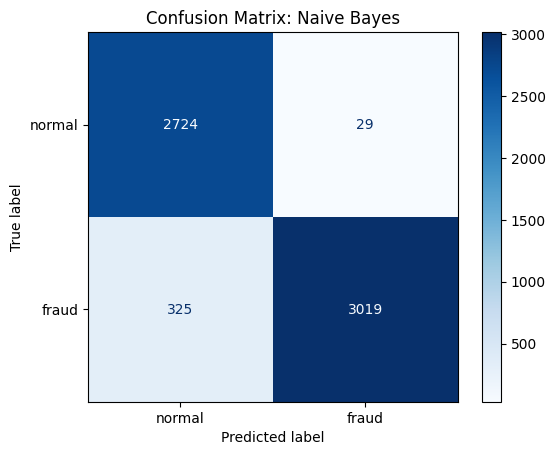

None




In [8]:
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


evaluate_model('Naive Bayes', model, X_test, y_test)
# accuracy = accuracy_score(y_test, y_pred)
# accuracies['NB'] = accuracy
# print(f"Naive Bayes Accuracy: {accuracy:.4f}")
# print("Classification Report:\n", classification_report(y_test, y_pred))



SVM Evaluation:
Accuracy: 0.9843
Precision: 0.9942
Recall: 0.9770
F1-Score: 0.9855
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2753
           1       0.99      0.98      0.99      3344

    accuracy                           0.98      6097
   macro avg       0.98      0.99      0.98      6097
weighted avg       0.98      0.98      0.98      6097

Confusion Matrix:


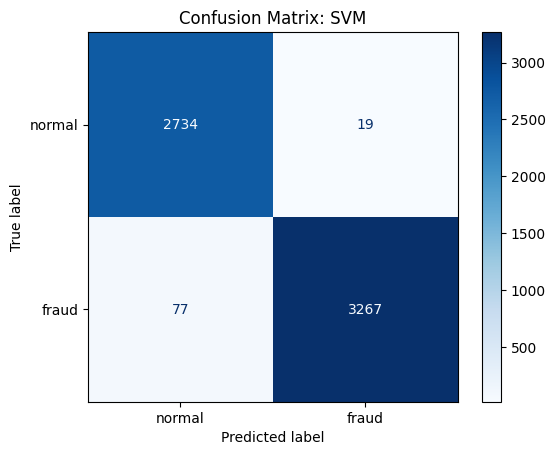

None




In [9]:
from sklearn.svm import SVC

#SVC
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model('SVM', model, X_test, y_test)

# accuracy = accuracy_score(y_test, y_pred)
# accuracies['SVC'] = accuracy
# print(f"SVC: {accuracy:.4f}")
# print("Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Evaluation:
Accuracy: 0.9844
Precision: 0.9972
Recall: 0.9743
F1-Score: 0.9856
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2753
           1       1.00      0.97      0.99      3344

    accuracy                           0.98      6097
   macro avg       0.98      0.99      0.98      6097
weighted avg       0.98      0.98      0.98      6097

Confusion Matrix:


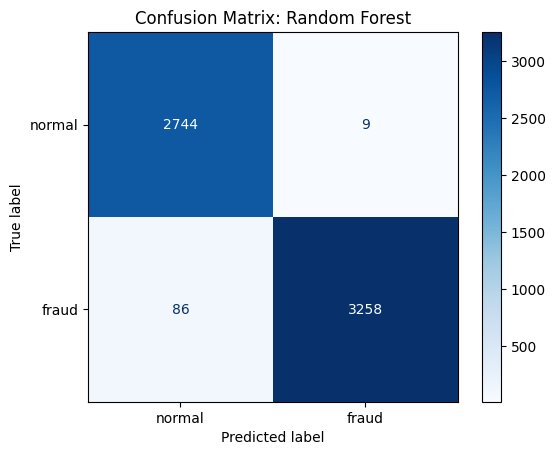

None




In [10]:
from sklearn.ensemble import RandomForestClassifier

#Random Forest
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model('Random Forest', model, X_test, y_test)

# accuracy = accuracy_score(y_test, y_pred)
# accuracies['Random Forest'] = accuracy
# print(f"Random Forest Classifier: {accuracy:.4f}")
# print("Classification Report:\n", classification_report(y_test, y_pred))


Logistic Regression Evaluation:
Accuracy: 0.9826
Precision: 0.9939
Recall: 0.9743
F1-Score: 0.9840
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2753
           1       0.99      0.97      0.98      3344

    accuracy                           0.98      6097
   macro avg       0.98      0.98      0.98      6097
weighted avg       0.98      0.98      0.98      6097

Confusion Matrix:


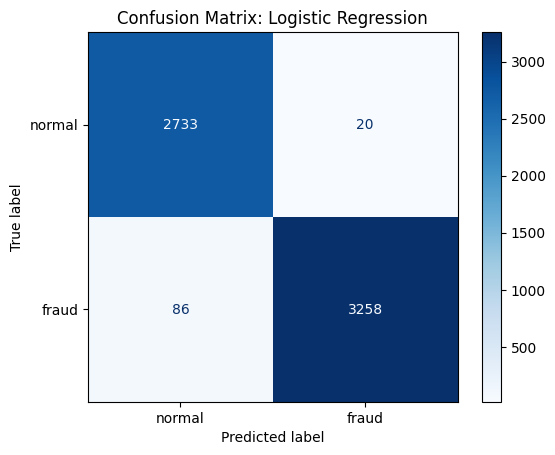

None




In [11]:
from sklearn.linear_model import LogisticRegression

#Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
evaluate_model('Logistic Regression', model, X_test, y_test)

# accuracy = accuracy_score(y_test, y_pred)
# accuracies['Logistic Regression'] = accuracy
# print(f"Logistic Regression: {accuracy:.4f}")
# print("Classification Report:\n", classification_report(y_test, y_pred))


Epoch 1/10
115/115 - 9s - loss: 0.1605 - accuracy: 0.9524 - val_loss: 0.0552 - val_accuracy: 0.9841 - 9s/epoch - 80ms/step
Epoch 2/10
115/115 - 9s - loss: 0.0400 - accuracy: 0.9885 - val_loss: 0.0560 - val_accuracy: 0.9831 - 9s/epoch - 77ms/step
Epoch 3/10
115/115 - 8s - loss: 0.0274 - accuracy: 0.9926 - val_loss: 0.0477 - val_accuracy: 0.9874 - 8s/epoch - 74ms/step
Epoch 4/10
115/115 - 9s - loss: 0.0218 - accuracy: 0.9943 - val_loss: 0.0452 - val_accuracy: 0.9891 - 9s/epoch - 75ms/step
Epoch 5/10
115/115 - 9s - loss: 0.0168 - accuracy: 0.9954 - val_loss: 0.0500 - val_accuracy: 0.9874 - 9s/epoch - 76ms/step
Epoch 6/10
115/115 - 9s - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0631 - val_accuracy: 0.9847 - 9s/epoch - 76ms/step
Epoch 7/10
115/115 - 9s - loss: 0.0134 - accuracy: 0.9962 - val_loss: 0.0524 - val_accuracy: 0.9880 - 9s/epoch - 75ms/step
Epoch 7: early stopping
191/191 [==============================] - 2s 8ms/step
LSTM Evaluation:
Accuracy: 0.9857
Precision: 0.9910
Recall: 

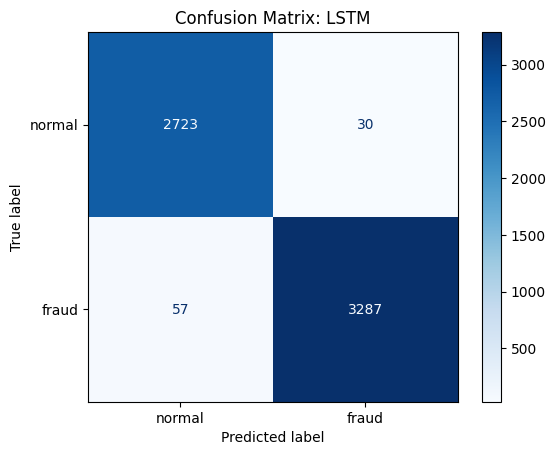

None




In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import EarlyStopping

# Deep Learning Model: Simple LSTM
# Tokenize text
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(data['message'])
X = tokenizer.texts_to_sequences(data['message'])
X = pad_sequences(X, maxlen=50)

# Split dataset 80:20
X_train, X_test, y_train, y_test = train_test_split(X, data['Label'], test_size=0.4, random_state=42)


# Build LSTM model
model = Sequential()
model.add(Embedding(1000, 128, input_length=50))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train
early_stop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stop], verbose=2)

# Evaluate
# loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
evaluate_model('LSTM', model, X_test, y_test)
# print(f"LSTM Model Accuracy: {accuracy:.4f}")


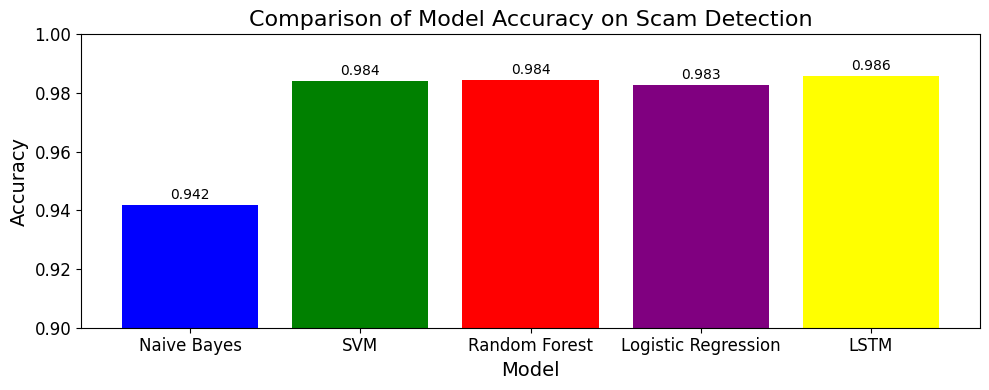

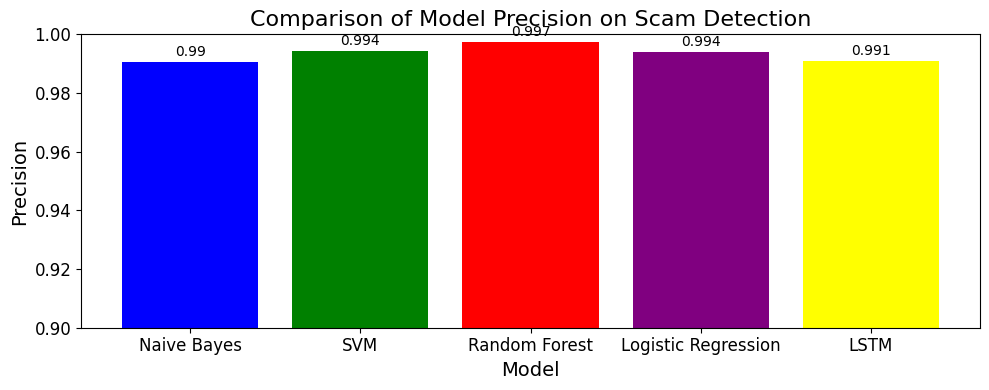

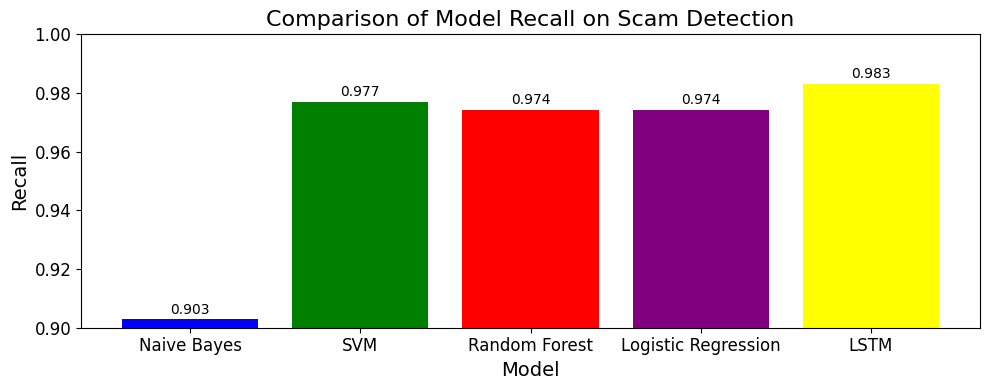

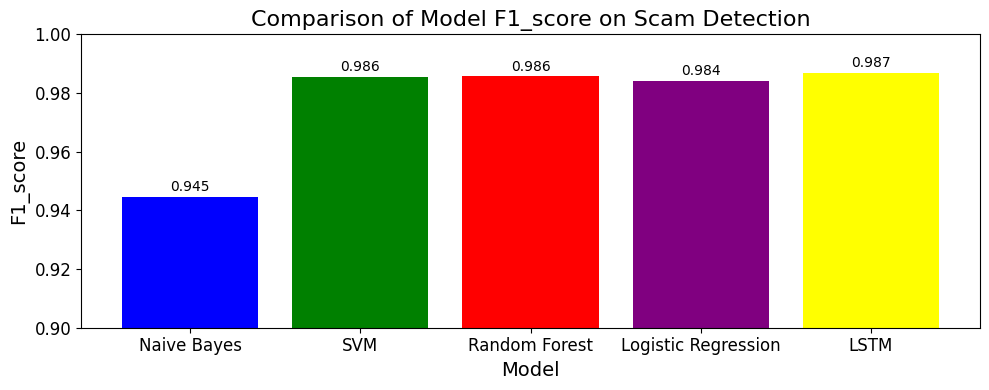

In [13]:

# Plot the evaluation metrics
metrics = ['accuracy', 'precision', 'recall', 'f1_score']
for metric in metrics:
    plt.figure(figsize=(10, 4))
    bars = plt.bar(evaluation_results.keys(), [evaluation_results[model][metric] for model in evaluation_results], color=['blue', 'green', 'red', 'purple', 'yellow'])
    
  # Add data labels above each bar for clarity
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 3), ha='center', va='bottom')

    plt.xlabel('Model', fontsize=14)
    plt.ylabel(metric.capitalize(), fontsize=14)
    plt.title(f'Comparison of Model {metric.capitalize()} on Scam Detection', fontsize=16)
    plt.ylim(0.9, 1)  # Set y-axis limit to make differences more distinct
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()